### college prospects last few years and the cities they come from

In [158]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import re

### First get info on each player from ESPN 100
http://www.espn.com/college-sports/basketball/recruiting/playerrankings/_/class/2018/order/true

### Make sure the object is a player

In [159]:
def is_player(item):
    #Players have tag 'tr' and class containing the word 'player'
    
    if (len(item["class"]) < 2):    #print(item["class"])   --- List object ex: ['oddrow', 'player-3550-43264']
        return False
    return re.match("player", item["class"][1])

### Make sure the player is from the United States

In [174]:

states_set = set(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])

def USA_player(player):
    #International locations contain 2 commas and will split into 3 parts OR wont be in states_set above
    return (len(player.find_all('td')[3].text.split(",")) == 2) and \
            player.find_all('td')[3].text.split(", ")[1][:2] in states_set

### Might be useful later on

In [161]:
def to_inches(height):
    if len(height) == 5:
        return (int(height[0]) * 12) + int(height[2])
    else:
        return (int(height[0]) * 12) + int(height[2:4])

### Extract info on class rank, name, height, weight, hometown, position

In [162]:
def get_info(player):
    all_info = player.find_all('td')
    class_rank = int(all_info[0].text)
    name = player.find('div', {'class':'name'}).a.text
    pos = all_info[2].text
    height = to_inches(all_info[4].text)
    hometown = all_info[3].text.split(", ")[1][:2]
    
    #Some players don't have recorded weights, give them weight 185
    if all_info[5].text.isdigit():
        weight = int(all_info[5].text)
    else:
        weight = 185

    return {
        "Name" : name,
        "Class Rank" : class_rank,
        "Position" : pos,
        "Height" : height,
        "Weight" : weight,
        "Hometown" : hometown
    }
    

### See how the information is looking

In [163]:
def preview_info(player):
    for i in player.find_all('td'):
        print(i.text)

### Crawl through the last 10 years of college prospects in the ESPN top 100

In [164]:
"""    Extract all the top 100 prospects from the past decade    """

players = []
for year in range(2009, 2019): #Get prospects from the last 10 years
    url = "http://www.espn.com/college-sports/basketball/recruiting/playerrankings/_/class/" + str(year) + "/order/true"
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    #print(type(soup('tr')))  --- bs4.element.ResultSet
    for item in soup('tr'):
        if is_player(item) and USA_player(item):
            #preview_info(item)
            players.append(get_info(item))

In [165]:
print("# of players: ", len(players))
print(players[0])
players[1]

# of players:  970
{'Name': 'Avery Bradley', 'Class Rank': 1, 'Position': 'SG', 'Height': 75, 'Weight': 180, 'Hometown': 'WA'}


{'Class Rank': 2,
 'Height': 81,
 'Hometown': 'GA',
 'Name': 'Derrick Favors',
 'Position': 'PF',
 'Weight': 220}

### Get general sense using bar graph and line graph

In [166]:
state_counts = {}
for player in players:
    if player["Hometown"] in state_counts:
        state_counts[player["Hometown"]] += 1
    else:
        state_counts[player["Hometown"]] = 1

In [167]:
print(state_counts)

{'WA': 20, 'GA': 67, 'OK': 6, 'AL': 17, 'NC': 50, 'FL': 52, 'CA': 88, 'IN': 36, 'TX': 82, 'NY': 41, 'MD': 41, 'NJ': 25, 'MA': 26, 'TN': 29, 'PA': 33, 'SC': 14, 'NV': 13, 'WI': 22, 'MN': 13, 'RI': 6, 'DC': 4, 'IL': 45, 'WV': 4, 'VA': 33, 'OR': 8, 'MI': 31, 'OH': 39, 'AZ': 13, 'AR': 11, 'LA': 17, 'MO': 14, 'KY': 8, 'IA': 7, 'KS': 6, 'NH': 4, 'MS': 13, 'NM': 2, 'CT': 8, 'DE': 4, 'ME': 1, 'CO': 7, 'NE': 2, 'UT': 7, 'MT': 1}


In [168]:
print(len(state_counts)) # 3 states don't even have college basketball prospects in the last 10 years

44


### Sort the information based on # of players who played college ball

In [169]:
"""
for key, value in state_counts.items():
    states.append(key)
    prospects.append(value)
"""
states = []
prospects = []
for k in sorted(state_counts, key=state_counts.get): #Thank you Stack Overflow
    states.append(k)
    prospects.append(state_counts[k]) 

### Was a bad idea to make a line graph to represent information

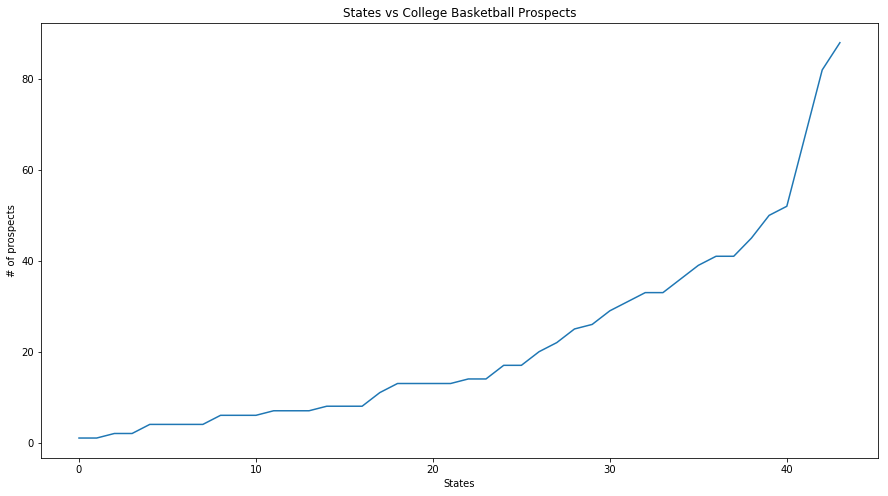

In [170]:
plt.figure(figsize=(15,8))
plt.plot(prospects)
plt.title("States vs College Basketball Prospects")
plt.ylabel("# of prospects")
plt.xlabel("States")
plt.show()

### Slightly better visualization

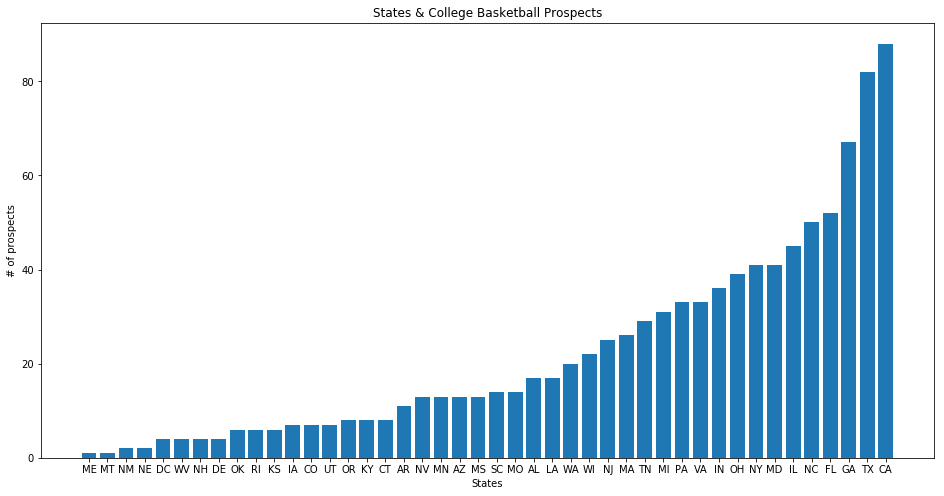

In [171]:
xs = [i for i,_ in enumerate(states)]
plt.figure(figsize=(16, 8))
plt.bar(xs, prospects)
plt.xticks(xs, states)
plt.title("States & College Basketball Prospects")
plt.ylabel("# of prospects")
plt.xlabel("States")
plt.show()

### Curious about the states w/out basketball prospects

In [172]:
for i in states_set:
    if i not in set(state_counts.keys()):
        print(i)

WY
AK
SD
VT
ID
HI
ND


### Possible reasons why:
### CA has 4 NBA teams and TX has 3, but doesnt explain others 